<a href="https://colab.research.google.com/github/venkatbabukr/AllProjects/blob/main/Scaler/Modules/ML_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\newcommand{\trinom}[3]{\begin{pmatrix} #1 \\ #2 \\ #3 \end{pmatrix}}$

# **Statistics concepts**

## Statistical measures

Mean
Median
Mode

Standard deviation

### Variance

ML types of variances possible:

1. Variance in data
2. Variance in target
3. Variance in prediction
4. Variance in residuals (errors)

## Distributions

### Normal distribution

### Skewed distribution

## The Amazing Activation/Logistic Function Sigmoid $\sigma(x)$

### Step functions

Functions that are steps in nature when we plot etc...

**Examples:**

1. **Pass/Fail function**: y = 0 for all x < 35 and 1 for all x >= 35
2. Any zero/one **binary classification** functions

**Problems with step functions**
1. They are not continuous
2. Hence, they are also not differentiable

**Solution:** Approximate them using Sigmoid functions!

### Inspiration ($n^x$)

The starting point is fact wrt exponentiation: $n^x$. For all n > 1, we can observe:

* $n^x$ = 0 for all x < -10
* Slowly start increasing as we approach 0 (-10 < x < 1)
* Exponentially goes to $\infty$ for all x > 1

From the above, if we come up with a function:
$$\boxed{S(X) = \frac{n^x}{(1 + n^x)}}$$

We can see that
* $S(X) = 0$ for all x < -10
* Slowly start increasing as we approach 0 (-10 < x < 1)
* $S(X) = 1$ for all x >= 1

$S(X)$ can very closely approximate **Step functions**

### Why use $e^x$

Out of all n for $n^x$, $e^x$ is very helpful because of the nature of it's derivative.

$d(a^x)/dx = a^x.ln(a)$

However, $d(e^x)/dx = e^x$, makes our life and calculations very simple!!!

Therefore, we choose Sigmoid function $\sigma(x)$ as

$$\boxed{\sigma(x) = \frac{e^x}{1 + e^x} = \frac{1}{1 + e^{-x}}}$$

### Other significant characteristics

1. $\frac{d(\sigma(x))}{dx} = \sigma(x) (1 - \sigma(x))$
2. $\sigma(-x) = 1 - \sigma(x)$
3. From 1 & 2 above:
    * $\frac{d(\sigma(x))}{dx} = \sigma(x).\sigma(-x)$

See notes [here](https://www.geeksforgeeks.org/machine-learning/derivative-of-the-sigmoid-function/)

**Sigmoid behavior table:**

| x | $\sigma(x)$ | More notes |
|:-- |:-- |:-- |
| < -5 | ~= 0 | Value ~0.0067 |
| -5 - 0 | 0.0 - 0.5 | Lower left curve |
| 0 - 5 | 0.5 - 1 | Upper right curve |
| > 5 | ~= 1 | Value ~0.9933 |

See the graph plot below too...

### Graph plot examples

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

**Simple sigmoid plot**

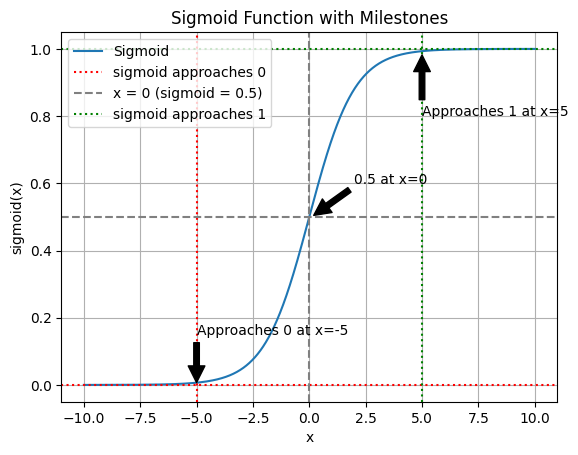

In [ ]:
x = np.linspace(-10.0, 10.0, 2000)
y = sigmoid(x)
plt.plot(x, y, label='Sigmoid')

# Add gridlines
plt.grid(True)

# Highlight when sigmoid starts to be > 0 (when x >= -5)
plt.axvline(x=-5, color='red', linestyle=':', label='sigmoid approaches 0')
plt.axhline(y=0, color='red', linestyle=':')

# Highlight sigmoid = 0.5 (when x = 0)
plt.axvline(x=0, color='gray', linestyle='--', label='x = 0 (sigmoid = 0.5)')
plt.axhline(y=0.5, color='gray', linestyle='--')

# Highlight sigmoid = 1 (asymptote, when x >= 5)
plt.axvline(x=5, color='green', linestyle=':', label='sigmoid approaches 1')
plt.axhline(y=1, color='green', linestyle=':')

# Add annotations for clarity
plt.annotate('Approaches 0 at x=-5', xy=(-5, 0), xytext=(-5, 0.15), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('0.5 at x=0', xy=(0.1, 0.5), xytext=(2, 0.6), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Approaches 1 at x=5', xy=(5, 0.99), xytext=(5, 0.8), arrowprops=dict(facecolor='black', shrink=0.05))

plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function with Milestones')
plt.legend()
plt.show()

**Pass/Fail function and it's sigmoid approximation:**

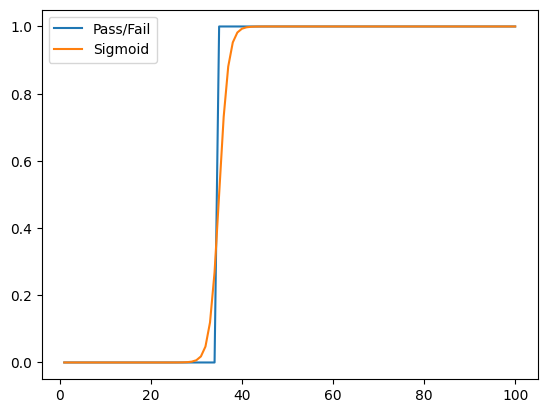

In [ ]:
def pass_fail(x):
    return np.where(x >= 35, 1, 0)

def sigmoid_pass_fail(x):
    return sigmoid(x-35)

x = np.linspace(1, 100, 100)
y = pass_fail(x)
y_sigmoid = sigmoid_pass_fail(x)

# Plot both pass_fail and sigmod using pyplot
plt.plot(x, y, label='Pass/Fail')
plt.plot(x, y_sigmoid, label='Sigmoid')
plt.legend()
plt.show()

### Proofs

**Proof1:** $d(\sigma(x))/dx = \sigma(x) * (1 - \sigma(x))$

We have

$\sigma(x) = 1/(1 + e^{-x}) = (1 + e^{-x})^{-1}$

$d(\sigma(x))/dx = -1 * (1 + e^{-x})^{-2} * -e^{-x}$

= $e^{-x}/(1 + e^{-x})^{2}$

=$1/(1 + e^{-x}) * e^{-x}/(1 + e^{-x})$

=$\sigma(x) * e^{-x}/(1 + e^{-x})$

=$\sigma(x) * (1 + e^{-x} - 1)/(1 + e^{-x})$

=$\sigma(x) * [(1 + e^{-x})/(1 + e^{-x}) - 1/(1 + e^{-x})]$

=$\sigma(x) * (1 - \sigma(x))$

=> $\boxed{\frac{d\sigma(x)}{dx} = \sigma(x) * (1 - \sigma(x))}$

# **ML Model Components**

1. **Variables ($X, y$):** The Data Representation. This is your raw material.
    * **Features** ($X$): The **independent variables**. In math terms, these are often represented as vectors or matrices.
    * **Targets** ($y$): The **dependent variable** you are trying to predict. They are also called as **labels**/**categories** in ML classification problems.
2. **Parameters ($\theta$ or w, b):** The Model State. These are the internal settings that define exactly how the mapping function behaves.
    * Weights ($w$): Determine the strength of the signal for each feature.
    * Bias ($b$): An additive constant that allows the model to shift the activation function.
3. **Mapping Function ($f_{\theta}(x)$):** The Hypothesis Space. This is the "shape" of the machine (e.g., a straight line, a complex neural network).   
   
   > To describe in simple mathematical terms: $y = f_{\theta}(x)$
4. **Loss Function ($L$):** The Objective Function (or Cost Function). This is the "North Star" that tells the model whether it's doing a good job or a bad one.
5. **Hyperparameter:**

# **ML Paradigms**

| Paradigm | The Core Idea | The Mathematical Goal |
| :--- | :--- | :--- |
| **Supervised Learning** | Learning with a teacher. | Mapping $x$ to a known $y$ (Label/Target). |
| **Unsupervised Learning** | Learning by finding patterns. | Modeling the underlying structure or distribution of $x$. |
| **Reinforcement Learning** | Learning by trial and error. | Maximizing a numerical reward signal through actions. |

# **ML variants**

## Supervised learning

1. **Classification problems**: When target is a category or class label
    * Binary classification
    * Multiclass classification
2. **Regression problems**: When target is a number
3. **Forecasting problems**: Special type of regression problems where timeseries is involved.

## Un-supervised learning

1. **Clustering**

## Hybrid learning

1. **Recommendation problems**:   
Examples:
    * Video recommendation done by youtube or prime etc...
    * Songs recommendation done by Spotify
    * Shopping recommendations done by Amazon  
    
   Recommendation problems can be modelled as both Supervised or Un-supervised.
     * **Supervised modeling/visualisation**: Extension of **classification problems**. Once we have classification, for a new data point, we not only find it's classification but also recommend to the new data point all other data that fall in the particular class/category!
     * **Unsupervised modeling/visualisation**: Cluster the data points to find similar groups. Now assign the new data point to the most suitable cluster and do mutual recommendations...


# **Data for ML**

## Signal & Noise

In data science, every single data point is a **composite** of signal & noise.

**The "Equation" View**

Think of every data point ($y$) as being built like this:$$\boxed{y = \text{Signal} + \text{Noise}}$$

* Signal:
   * The **structural relationship** between variables that persists across different samples of data.
   * The underlying "truth" or physical law (e.g., gravity, a marketing trend.
   * It is predictable and repeatable.
* Noise:
   * The **stochastic (random) variation** that is unique to a specific sample and contains no useful information for future predictions.
   * The random interference (e.g., measurement error, a sensor glitch, or a random person's mood).
   * It is unpredictable and unrepeatable.

**The Variance View**

Since we have TSS = ESS + RSS

=> TSS/m = ESS/m + RSS/m

=> $\boxed{\sigma_y^2 = \sigma_s^2 + \sigma_n^2}$ Or $\boxed{\text{Total Variance = Signal Variance + Noice Variance}}$

### Signal-Noise ratio

**Formula:**

$\boxed{SNR = \frac{\sigma_s^2}{\sigma_n^2} i.e. \frac{\text{Signal Variance}}{\text{Noise Variance}}}$

**Calculation**

* However, SNR is calculated from $R^2$ generally.

* The range of SNR is $[0, \infty]$

See [$R^2$ Coefficient of Determination]() for details.

## Outliers

## Class Imbalance

## Data Leakage
This is arguably the most dangerous issue because it gives you a false sense of success. It happens when information from the future or the target variable "leaks" into your training data, allowing the model to "cheat".

* **Target Leakage**: Including features that are only available after the event you're trying to predict (e.g., including "refund_status" to predict if a transaction is "fraudulent").
* **Train-Test Contamination**: Performing preprocessing (like scaling or mean imputation) on the entire dataset before splitting it into training and test sets.

## Data drift

Occurs when the statistical properties of your input data change over time (e.g., a recommendation engine failing because user fashion trends changed). Without continuous monitoring, a perfectly trained model will eventually become obsolete.

## Non-Representative Data (Selection Bias)

If your training data doesn't look like the real world, your model won't either.
* Sampling Bias: Training a medical model only on data from one hospital might make it fail for patients at another location with different demographics.
* Historical Bias: If your historical data contains human prejudices (e.g., past biased hiring decisions), the model will likely automate and scale that bias.

## Curse of Dimensionality

## Multicollinearity - VIF

## Homo (Hetero) scidasticity - The FAN effect

## Cleaning up the data

### Removing nulls

### Target Variable Encoding

### Feature scaling

### VIF - Variance Inflation Factor (Variance Inflating Factor)

Is calculated for each feature/predictor to measure how much its variance is inflated due to multicollinearity with all other features/predictors in the model.

Lower VIFs are not of much interest. Look for higher VIFs

**Formula, explanation, derivation**

$\boxed{VIF_j = 1/(1 - R^2_j)}$

Here, $1 - R^2_j$ is called **Tolerance** of jth variable ($T_j$)

$\boxed{VIF_j = 1/T_j}$

**Relationships**

As $R^2_j$ increases, Tolerance of jth variable $T_j$ decreases, $VIF_j$ increases!!!

* If $R^2_j$ is 0.70, $T_j$ is 0.30 and $VIF_j$ is 3.33 (Acceptable)
* If $R^2_j$ is 0.90, $T_j$ is 0.10 and $VIF_j$ is 10.0 (Problematic)
* If $R^2_j$ is 0.99, $T_j$ is 0.01 and $VIF_j$ is 100.0 (Severe Multicollinearity)

### VIF & SNR

It can be simply proved that $VIF_j = SNR_j + 1$

**Proof 1:**

$VIF_j = 1 / (1 - R^2_j)$

But $R^2_j = SNR_j/(1 + SNR_j)$

=> $VIF_j = \frac{1}{(1 - SNR_j/(1 + SNR_j))}$

=> $VIF_j = \frac{1}{(1 + SNR_j - SNR_j)/(1 + SNR_j)}$

=> $VIF_j = 1 + SNR_j$

**Proof 2:**

$SNR_j = R^2_j/(1 - R^2_j)$

=> $SNR_j + 1 = [R^2_j/(1 - R^2_j)] + 1$

=> $SNR_j + 1 = (R^2_j + 1 - R^2_j)/(1 - R^2_j)$

=> $SNR_j + 1 = 1/(1 - R^2_j)$

=> $\boxed{VIF_j = SNR_j + 1}$

# **Vector concepts**
### Vector
  * Norm of vector ||$\vec{v}$||: Magnitude of the vector (typically it's length).
    * L1 norm $||\vec{v}||_1$: Is the manhattan distance $x_1$ + $x_2$ + ... + $x_n$
    * L2 norm $||\vec{v}||_2$: Is the euclidian distance $\sqrt{x_1^2 + x_2^2 + ... x_n^2}$
### Angle between vectors
  * Gives us idea of similarity between the two vector embeddings
    * Lesser angle => Two vectors are more similar
  * Typically determined by doing dot product. See [dot product formula](#dot_product_formula).
  * Two vectors $\vec{v_1}$ and $\vec{v_2}$ are said to be orthogonal/perpendicular to each other when their dot product = 0 i.e. $\vec{v_1} . \vec{v_2}$ = 0
### Distance
  * Distance between point and decision hyperplane
    * Gives us a measure of confidence of classification of the point by the hyperplane.
      * Greater distance ~= More confidence
      * Lesser distance ~= Less confidence
    * Always use the [distance formula](#point_distance_formula) to measure distance of point from decision plane.
  * Distance between two parallel hyperplanes
### Hyperplanes
  * The bounding planes that separate given space into two half-spaces: Positive halfspace and negative halfspace.
#### Weight vector
  * The vector that is orthogonal to the given decision hyperplane.
#### Bias
  * Weight vector determines direction, while bias geometrically identifies the distance of the hyperplane from origin.
  * Three different interpretations of bias:
    * **Geometric:** ***Weights rotate*** the hyperplane; ***bias translates*** it. If you remove bias, you’re saying: “The origin itself has semantic meaning.” - which is almost never true in real data.
    * **Mathematical/Algebraic:** Bias represents one more degree of freedom/dimension.  
    Rewrite the classifier like this:  
    $w^T$x + b = $\binom{w}{b}^T$ $\binom{x}{1}$ = [w b]$\binom{x}{1}$.  

      Now bias is just: a weight on a constant feature
    * **Logical:** Prior or default decision.  
    “If there were no signal at all, what would I predict?”  
    In the No-signal case, x = 0, so $w^T$x + b = b.  
    So:  
    b > 0 => Default towards +ve classification  
    b < 0 => Default towards -ve classification  
    Bias encodes the classifier’s baseline belief before seeing any evidence.

# **Important formulae**

* <a id="dot_product_formula">Dot product:</a> $\vec{v_1}.\vec{v_2}$ = $|v_1||v_2| cos\theta$
  * Use this to determine many things:
    * Angle between two vectors
    * Projection of one vector on other
* <a id="point_distance_formula">Distance of point</a> $x_1$ from hyperplane $\vec{w}$.x + $w_0$ = 0 is: ($\vec{w}$.$x_1$ + $w_0$) / ||$\vec{w}$||
  * If distance is +ve, the point $x_1$ is in positive halfspace of the decision hyperplane
  * If distance is -ve, the point is in negative halfspace of the decision hyperplane
* Distance of origin from hyperplane $\vec{w}$.x + $w_0$ = 0 is: $w_0$ / ||$\vec{w}$||
* Distance between hyperplanes
  * Two hyperplanes $\vec{w}x + w_0 = 0$ and $\vec{w'}x + w'_0 = 0$ are said to be parallel only if one can be expressed as a multiple of another. i.e. both can be expressed as $w_1x_1 + w_2x_2 + ... w_0 = 0  (ax_1 + bx_2 + ... c_1 = 0)$ and $w_1x_1 + w_2x_2 + ... p.w'_0 = 0 (ax_1 + bx_2 + ... c_2 = 0)$
  * For such hyperplanes, distance between them = $|p.w'_0 - w_0|$/$\sqrt{w_1^2 + w_2^2...}$ i.e. ($|c_2 - c_1|$/$\sqrt{a^2 + b^2...})$

# **Minimisation/Optimization Functions**

## Gain & Loss Functions

Let $\vec{W} = \begin{bmatrix}\vec{w} & w_0\end{bmatrix}$

Gain function $G(\vec{W}, X, Y)$ is a function that maximizes the fit of regression model to the given training data points. Our ML training objective is to find weights/parameters that maximises this gain function.

$$\vec{W}_{opt} = argmax_{\vec{W}} G(\vec{W}, X, Y)$$

In practice however, it is easier to find minima than finding maxima. So, we focus on minimizing the Loss function which is negative of Gain function.

$$\boxed{
L(\vec{W}, X, Y) = -G(\vec{W}, X, Y) \\
. \\
\vec{W}_{opt} = argmin_{\vec{W}} L(\vec{W}, X, Y)
}$$



## Linear regression - Mean Square Error (MSE)

We choose loss function $L(\vec{W}, X, Y) = MSE / 2$.

> 1. We want to minimize the MSE to get a best fit model.
> 2. The division by 2 is to help us simplify the calculations of gradient descent because in $\nabla MSE$ we will get `2 *` multiplication factor that can be cancelled out.

=> $\vec{W}_{opt} = argmin_{\vec{W}} MSE / 2$

=> $\vec{W}^{t+1} = \vec{W}^t - \eta \nabla_{\vec{W}}MSE(\vec{W}, X, Y)$

### $\nabla L$ - Gradient of MSE

$\nabla L$ = $\nabla_{\vec{W}}1/2 * MSE(\vec{W}, X, Y) = \nabla_{\vec{W}} 1/2m * (Y - X^T.\vec{W})^2$

= $2 * 1/2m * (Y - X^T.\vec{W}) . (-X^T)$ [--> By applying chain rule]

= $-1/m * (Y - \hat{Y}).X^T$

Therefore, we get:

$\vec{w}^{t+1} = \vec{w}^t + \eta/m * \Sigma_{j=1}^{m}(y_j - \hat{y_j}).X^T$

$w_0^{t+1} = w_0^t + \eta/m * \Sigma_{j=1}^{m}(y_j - \hat{y_j})$

### Code for Linear Regression

In [ ]:
def linear_regression(X, Y, niter=100, eta=0.01):
    m, k = X.shape
    w_vec = np.zeros((k, 1))
    w_0 = 0

    # For further optimization, we can also use lr_factor
    # lr_factor = eta/m
    for _ in range(niter):
        Y_hat = X @ w_vec + w_0
        w_vec = w_vec + eta/m * (Y - Y_hat).T @ X
        # Can also be: w_vec = w_vec + lr_factor * (Y - Y_hat).T @ X
        w_0 = w_0 + eta/m * np.sum(Y - Y_hat)
        # Can also be: w_0 = w_0 + lr_factor * np.sum(Y - Y_hat)
    return w_vec, w_0


## Logistic Regression - LogLoss

### Vanilla Gain & Loss Functions

### Gain function
G(X, $\vec{w}$, $w_0$) = $\sum_{i=1}^{n}$ ($\vec{w}^Tx_i$ + $w_0$) * $y_i$ / $||\vec{w}||$

$\vec{w^*}$, $w_0^*$ = $argmax_{\vec{w},w_0}$ [G(X, $\vec{w}$, $w_0$)] = $argmax_{\vec{w},w_0}$ $\sum_{i=1}^{n}$ ($\vec{w}^Tx_i$ + $w_0$) * $y_i$ / $||\vec{w}||$

### Loss function
L(X, $\vec{w}$, $w_0$) = -G(X, $\vec{w}$, $w_0$)

$\vec{w^*}$, $w_0^*$ = $argmin_{\vec{w},w_0}$ [L(X, $\vec{w}$, $w_0$)] = $argmin_{\vec{w},w_0}$ -( $\sum_{i=1}^{n}$ ($\vec{w}^Tx_i$ + $w_0$) * $y_i$ / $||\vec{w}||$)


### Why MSE won't work

In logistic regression, we are not finding a line/hyperplane/hyper model that fits all data points. Instead, we are focusing on finding best fit model that separates two classes of points.

Therefore, when we plot MSE here, we'll be getting a non-convex curve with atleast 2 minimas. All the points that are far from the regression line/model including outliers will create multiple minimas in MSE curve!

Hence, MSE can't be chosen as gain/loss function for logistic regression.

### The Magical Likelihood (Reward) Function

A best fit logistic regression model is one where model's prediction probability matches the actual classification value. i.e. we need to maximize the likelyhood of model prediction to the actual classification value. So, we can come up with a gain function/reward function as below:

$$G(\vec{W}, X, Y) = Y_{pred}^Y * (1 - Y_{pred})^{(1 - Y)}$$

This gain function will increase the likelihood of model prediction probability to become equal to actual.

* For all +ve classes (Y = 1), this function rewards increase in $P(X) = Y_{pred}$

* For all -ve classes (Y = 0), this function rewards decrease in $P(X) = Increase(1 - Y_{pred})$

Applying on all points, we get:

$G(\vec{W}, X, Y) = \text{Likelihood} = \Pi_{i=1}^m \hat{y_i}^{y_i} * (1 - \hat{y_i})^{(1 - {y_i})}$

Taking log, we get
$\boxed{G(\vec{W}, X, Y) = \text{Log Likelihood} = \Sigma_{i=1}^m y_i * log(\hat{y_i}) + (1 - {y_i}) *log(1 - \hat{y_i})}$

### Log Loss/Cross Entropy

Loss function $L(\vec{W}, X, Y) = -G(\vec{W}, X, Y0$

=> $L(\vec{W}, X, Y) = \text{Log Loss} = -\Sigma_{j = 1}^m y_j * log(\sigma(z_j))-\Sigma_{j = 1}^m (1 - y_j) * log(1 - \sigma(z_j))$

#### $\nabla L$ Gradient of LogLoss

It can be proven that

$\nabla L = -1/m * \Sigma_{j = 1}^m (y_j - \hat{y_j}) * X^T$

See detailed explanation [here](https://medium.com/@ilmunabid/beginners-guide-to-finding-gradient-derivative-of-log-loss-by-hand-detailed-steps-74a6cacfe5cf).

Therefore, we get the same weight updation formula:

$\vec{w}^{t+1} = \vec{w}^t + \eta/m * \Sigma_{j=1}^{m}(y_j - \hat{y_j}).X^T$

$w_0^{t+1} = w_0^t + \eta/m * \Sigma_{j=1}^{m}(y_j - \hat{y_j})$

### Code for Logistic Regression

In [ ]:
def sigmoid(Z):
  return 1/(1 + np.exp(-np.clip(Z, -500, 500)))

def logistic_regression(X, Y, niter=100, eta=0.01):
    m, k = X.shape
    w_vec = np.zeros((k, 1))
    w_0 = 0

    # For further optimization, we can also use lr_factor
    # lr_factor = eta/m
    for _ in range(niter):
        Z = X @ w_vec + w_0
        Y_pred = sigmoid(Z)

        w_vec = w_vec + eta/m * (Y - Y_pred).T @ X
        # Can also be: w_vec = w_vec + lr_factor * (Y - Y_pred).T @ X
        w_0 = w_0 + eta/m * np.sum(Y - Y_pred)
        # Can also be: w_0 = w_0 + lr_factor * np.sum(Y - Y_pred)
    return w_vec, w_0


# Performance Metrics

### $R^2$ Coefficient of Determination

* Significance or meaning of $R^2$ in layman terms:
    * This is a measure of **Goodness-of-fit**!
    * Captures how much variation (variance) the best fit is able to explain.
* Higher $R^2$ => Better fitting model with following caveats.

    * Overfitting trap: If the model is trained with lot of noise, then it has incorporated so much noise that it'll fail to work in real world! Therefore, ensure there is maximum noise reduction in training data!

    * Biased modeling! If we come up with a linear regression model for a pattern that is actually non-linear in real world, even very high $R^2$ doesn't ensure our model is correct! Solution: Always check your **Residual Plots** to see if the errors are random

    * $R^2$ doesn't work well for non-linear models!

**Formula, explanation, derivation:**

Fundamental definition/formula

$\boxed{R^2 = \frac{\text{Explained Variance}}{\text{Total Variance}} = \frac{\sigma^2_{\hat{y}}}{\sigma^2_y}}$

Since Explained Variance = Total Variance - Unexplained Variance (Residual Variance)

we get $R^2 = 1 - \frac{\text{Unexplained Variance (Residual Variance)}}{\text{Total Variance}}$

Let us take following terms:

* TSS: Total Sum Of Squares = $\Sigma (y - \bar{y})^2$
* ESS: Explained Sum Of Squares = $\Sigma (\hat{y} - \bar{\hat{y}})^2$ = $\Sigma (\hat{y} - \bar{y})^2$ (Can be proved using OLS regression)
* RSS: Residual Sum Of Squares = $\Sigma (y - \hat{y})^2$

Then,

$\sigma^2_{\hat{y}}$ = ESS / m

${\sigma^2_y}$ = TSS / m

=> $R^2$ = ESS / TSS

Now,

TSS = ESS + RSS (Can be proved using ***Ordinary Least Squares (OLS) regression***)

=> $R^2$ = (TSS - RSS) / TSS

=> $\boxed{R^2 = 1 - RSS/TSS}$

Divide numerator and denominator of RSS/TSS by m, we get

$R^2 = 1 - \frac{RSS/m}{TSS/m}$

=>$\boxed{R^2 = 1 - MSE/\sigma^2(Y)}$ (Because MSE = RSS/m)

**How can we use $R^2$ effectively?**

* Find out $R^2$ of your training model only to understand **how well the model has captured the variance in data**.
    * A low $R^2$ means, the model has not yet captured variance in data.
    * A high $R^2$ means the model has good fit with the data points.
* This metric can help at times when we don't have enough training and testing data.
* **Adjusted $R^2$** is more helpful when we have very less training & testing data and wish to find out whether adding a new feature is improving the model or worsening the model...

### Adjusted $R^2$

Overcomes practical symptoms/drawbacks of $R^2$:
1. Overfitting
    * If you have 5 data points and 4 predictors, your $R^2$ will almost always be 1.
2. False confidence
    * When a model perfectly memorizes all the specific answers of training, it's $R^2$ will be close to 1, but the model might fail actual exam!

**Formula, explanation, derivation**

Fundamental definition/formula:

$\boxed{R^2_{adj} = \frac{\text{Unbiased Explained Variance}}{\text{Unbiased Total Variance}} = \frac{\sigma^2_{\hat{y}} / df_{model}}{\sigma^2_y / df_{total}}}$

Since $\text{Unbiased Explained Variance} = \text{Unbiased Total Variance} - \text{Unbiased Residual Variance}$

We get $R^2_{adj} = 1 - \frac{\text{Unbiased Residual Variance}}{\text{Unbiased Total Variance}}$

Here,

* $df_{total}$ = m - 1 (One less than the number of data items)

* $df_{model}$ = $df_{residual}$ = $df_{total}$ - k = m - 1 - k

* Unbiased Residual Variance = $RSS / df_{residual} = RSS / (m - 1 - k)$

* Unbiased Total Variance = $TSS / df_{total} = TSS / (m - 1)$

=> $R^2_{adj}$ = $1 - \frac{RSS / (m - 1 - k)}{TSS / (m - 1)}$

=> $\boxed{R^2_{adj} = 1 - \frac{RSS * (m - 1)}{TSS * (m - 1 - k)}}$


Since RSS/TSS = 1 - $R^2$, we get

$\boxed{R^2_{adj} = 1 - \frac{(1 - R^2) * (m - 1)}{(m - 1 - k)}}$

**Logical understanding**

* If your RSS increases, naturally both $R^2$ and $R^2_{adj}$ decrease.

* If your RSS remains the same or decreases marginally with added features/detectors, your $R^2$ might remain same but $R^2_{adj}$ will decrease indicating you are adding dead weight detectors!

* If your RSS decreases significantly with added features/detectors, both $R^2$ and $R^2_{adj}$ will start to increase indicating that you are indeed getting a better model!

**Intuition**

The formula is designed to penalize complexity - when we try to get a linear regression model by adding more features!

As you can visualize a squiggly line in 2-D can be made to look a perfect straight line (or fitted within a hyperplane) in N-D! But that doesn't mean the model is correct, it means we made the model look correct by adding lot of dead weight predictors!

Say you have 3 datapoints that look like a triangle when plotted in 2-D, you can't find a linear regression for this! But if you increase the dimensionality to 3-D even by adding any dead weight predictor, you can immediately find a plane that covers all the three points! Does this mean the problem is now a linear regression? $R^2$ will intuitively say ***Yes***, but $R^2_{adj}$ is a metric that will try it's best to apply brakes on this illusion/false confidence.


As you keep adding dimensions (features), you are essentially giving the model enough "room" to twist and turn until it touches every data point.
* Simple $R^2$ sees this and says: "Wow, zero error! Perfect model!
* $R^2_{adj}$ looks at the "cost" of those extra dimensions and says: "You used 10 dimensions to explain 10 points. That's not a model; that's just a map of the noise."

If $R^2$ is 0.99 but $R^2_{adj}$ is 0.50, your "squiggly line in N-D" has overfitted the data, and it will likely fail miserably the moment you give it a new $X$ value.

### $R^2$ and SNR (Signal Noise Ratio)

We know $R^2 = \frac{\text{Explained Variance}}{\text{Total Variance}}$

Substitute `Total Variance = Explained Variance + Noise Variance` in the above

=> $R^2 = \frac{\text{Explained Variance}}{\text{Noise Variance} + \text{Explained Variance}} = \frac{\sigma_s^2}{\sigma_n^2 + \sigma_s^2}$

Divide the whole by $\sigma_n^2$

=> $R^2 = \frac{\sigma_s^2 / \sigma_n^2}{(\sigma_n^2 + \sigma_s^2)/\sigma_n^2}$

=> $\boxed{R^2 = \frac{SNR}{1 + SNR}}$

And

$\boxed{SNR = \frac{R^2}{1 - R^2}}$

**Practical example:**

If a model has $R^2$ = 0.9

=> SNR = 0.9/(1 - 0.9) = 0.9/0.1 = 9

### Understanding $R^2$ & Relationships

> **Important things to remember**
>
> 1. **$R^2_{adj}$** will **always be <= $R^2$**
>     * It'll **catch-up with $R^2$** as the **model improves**.
> 2. Only when $R^2$ becomes > 0.5, SNR will start exponentially increasing from 1 (because Numerator of SNR will start becoming > Denominator of SNR)

| $R^2$ | Model details | $R^2_{adj}$ | SNR | $VIF_j$ (When applicable) | More Notes |
|:-- |:-- |:-- |:-- |:-- |:-- |
| < 0 | Model is **worse** | N/A | N/A | N/A | Model is **worse** than just **guessing the average** |
| 0 | Model is same as the mean line |  -ve (< 0) | 0 | 1 | * The model is worse than a simple horizontal line (the mean)<br> * There is already one variance increasing factor |
| 0 - 0.5 | Poor model<br>Noise is still > Signal | <= $R^2$ | 0 to 1 | 1 to 2 | * Noise is still > Signal<br> * $R^2_{adj}$ can go < $R^2$ if we are adding ***dead weight detectors*** |
| 0.5 | Average model<br>Signal = Noise | <= $R^2$ | 1 | 2 | The "tipping point" for many models |
| 0.5 - 0.99 | Model is learning signal | ~=$R^2$ | 1 to $\infty$ | 2 to $\infty$ | * If $R^2_{adj} < R^2$, model is fitting but dead weight detectors are present<br> * Signal > Noise, the pattern is getting clearer |
| 1 | Pure Signal, complete fit | ~= 1 | $\infty$ | $\infty$ | * If $R^2_{adj}$ < 1, then, model is achieving fit using dead weight detectors! <br> * Pure signal, no noise at all |

## Linear regression - Regularization

**Idea/Concept/Philosophy**

Model Overfitting (Model learning noise) occurs when a model treats noise as a signal, resulting in unnaturally large weights as it tries to fit into noisy points too. Regularization introduces a penalty term to the cost function, creating a tug-of-war between fitting the training data and keeping the weights small. This forces the model to prioritize the most important features and ignore the "noise," leading to better generalization on new data.

**Definition**

Regularization is the process of adding penalty to the loss function to avoid model overfitting.

### L1 Regularization (Lasso)

### L2 Regularization (Ridge)

### Elastic Net Regularization

## References

1. [Nice derivation of partial derivatives of all loss functions](https://medium.com/@ilmunabid/beginners-guide-to-finding-gradient-derivative-of-log-loss-by-hand-detailed-steps-74a6cacfe5cf)

# **Building LRM**

In [ ]:
import numpy as np

def get_unique_ints_sample(n_range: int):
  samples = np.arange(n_range)
  np.random.shuffle(samples)
  return samples.reshape(-1, 1)

def r2_score_adj(r2_score, X):
  m = X.shape[0]
  k = X.shape[1]
  return 1 - ((1 - r2_score) * (m - 1)) / (m - 1 - k)

### Sample LRM using Scikit-learn (sklearn)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

# Prepare model inputs
total_data_size = 100
test_data_frac = 0.3

X = get_unique_ints_sample(total_data_size)
Y = X**2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_data_frac)

# Build LR model using sklearn
model = LinearRegression()
model.fit(X_train, Y_train)

# Calculate performance metrices
Y_pred = model.predict(X_test)
r2_scr = r2_score(Y_test, Y_pred)
r2_scr_adj = r2_score_adj(r2_scr, X_train)

plt.title("Regression line + Model & Test data")
plt.scatter(X_train, Y_train, color = 'blue')
plt.scatter(X_test, Y_test, color = 'yellow')
plt.plot(X_test, Y_pred, color='red')

plt.legend(["Training data", "Test data", "Regression line"])
plt.show()

print(f"""
R2 score: {r2_scr}
R2 score (adj): {r2_scr_adj}
""")

plt.title("Residual plot")
plt.scatter(X_test, Y_test - Y_pred)
plt.show()


### Sample LRM using Stats-model

In [ ]:
import statsmodels.api as sm
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

X = get_unique_ints_sample(100)
Y = X**2

sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

# Assuming 'model' is your fitted statsmodels OLS object
residuals = results.resid
fitted_values = results.fittedvalues

plt.figure(figsize=(8, 5))
sns.residplot(x=fitted_values, y=residuals, lowess=True,
              line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals plot')
plt.show()

# **Cross validation**

# **Error conditions in models**

## Residual plot

## Multicollinearity

## Overfitting & Underfitting

### Biased Model (Underfitting)

Biased models are having following characteristics:

1. Inflexibility of the model's assumptions.
    * **Example:** Using a simple Linear Regression to map a complex, curving relationship.

2. Oversimplified regression equation where very few parameters are considered and given high weights ignoring too many other features! See related: [Dead weight detectors]()

### High Variance Model (Overfitting)

1. "Variance" refers to how much the model's prediction would change if you trained it on a slightly different dataset. A high-variance model "wiggles" too much to hit every single point.
    * **Example:** A 15th-degree polynomial trying to fit 10 data points. It will pass through every point perfectly but shoot off into infinity between them.

### Comparision matrix

| Model Type | Technical equivalent<br>Primary Issue | Assumption | Error Source |
|:-- |:-- |:-- |:-- |
| High Bias | Underfitting | The world is simpler than it actually is.| Missing the pattern |
| Occam's Razor | Generalization<br>Optimal Fit | * The simplest explanation is likely the right one<br>* Model is ready for the real world | Minimal (Expected) |
| High Variance | Overfitting | Every random fluke in this data is a strict rule | * Following the noise <br> * Model is "hallucinating" patterns in noise |

## Model coefficient issues

### Complex model and Dead weight detectors - Having ~0 coefficients

### Incomparable coefficients - Improper feature scaling

### Unreliable coefficients - Multicollinearity

### Unidentifiable model

In broader statistics, if a model is set up such that multiple sets of weights can produce the exact same result, the model is called **Unidentifiable**. Both multicollinearity and poor scaling (in the context of certain algorithms) can contribute to a model being difficult to "identify" or explain clearly.

## Heteroscedasticity

## Auto correlation of errors (Serial correlation of errors)

# Abbreviations

| Abbreviation | Expansion | More notes |
| :-- | :-- | :-- |
| **Data Analysis** |
| EDA | Exploratory Data Analysis | See Pandas notes on EDA |
| **Machine Learning** |
| ***Section 1*** |
| **G** |
| ***GD*** | Gradient Descent | Algorithm to optimally find the minima of loss function |
| BGD | Batch Gradient Descent | Batch Gradient Descent uses chunks/batches of data set to perform gradient descent |
| MBGD | Mini Batch Gradient Descent | * BGD is very slow, but smooth transition to converge to the local minima<br>* SGD is very fast, but very noisy descent to converge to the local minima<br>* MBGD is best option, as it combines best of both worlds. Just that you need data of enough size to employ MBGD |
| SGD | Stochastic Gradient Descent | * Variant of GD<br>* It is a stochastic process/stochastic algorithm to find minima of loss function.<br>* Fast when compared to BGD<br>* Very noisy descent |
| |
| **L** |
| ***LRM*** | Linear Regression Model | Modelling problem as a combination of linear hyperplanes |
| MLRM | Multiple Linear Regression Model | * A Linear regression model built on more than one variable.<br>* Visualization can be achieved upto just 2 variables (max 3D graph plot)<br>* Hyperplane will be built in a d+1 dimensional graph where d is the number of variables |
| SLRM | Simple Linear Regression Model | * A Linear regression model built on single variable.<br>* Can be visualized using 2D graph plot |
| |
| **P** |
| PCA | Principal Component Analysis | |
| ***Section 2*** |
| VIF | Variance Inflation Factor | Diagnostic tool used in multiple regression analysis to measure the severity of ***multicollinearity***. Details here |
| ***Section 3*** |
| **M** |
| ***ME*** | Mean Error | * Just mean of the errors<br> *Avoid it completely as it is prone to miscalculation (esp. when errors cancel out and mean becomes 0 despite errors present!) |
| MAE | Mean Absolute Error | |
| MSE | Mean Square Error | MSE is equivalent to variance in errors! |
| RMSE | Root Mean Square Error | * RMSE is the standard deviation in errors!<br>* Better for reporting purposes whereas MSE is most suited for optimisation over MAE |
| |
| **R** |
| ***$R^2$*** | Coefficient of determination | Details here |
| $R^2_{adj}$ | Adjusted $R^2$<br>(Adjusted Coefficient of determination) | Details here |
| RSS | Residual Sum of Squares | Details here |
| TSS | Total Sum of Squares | Details here |
| |
| **S** |
| SSE | Sum Of Squared Errors | TODO: More notes |
| |
| **V** |
| VIF | Variance Inflation Factor | |

# Terms